In [6]:
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
def plot_word_vectors(model, words, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    vectors = [model[word] for word in words]
    pca = PCA(n_components=2, whiten=True)
    vectors2d = pca.fit(vectors).transform(vectors)
    plt.figure(figsize=(6,6))
    plt.axis([x1, x2, y1, y2])

    first = True 
    for point, word in zip(vectors2d , words):
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    if title:
        plt.title(title)
                        
    plt.tight_layout()
    plt.show()

In [8]:
import gensim.models.doc2vec
from gensim.models import Doc2Vec

model_path = 'output/1620410374733_pv_dmc_dim=200_window=5_epochs=20/doc2vec.model'
model = Doc2Vec.load(model_path)

## Plot similar words

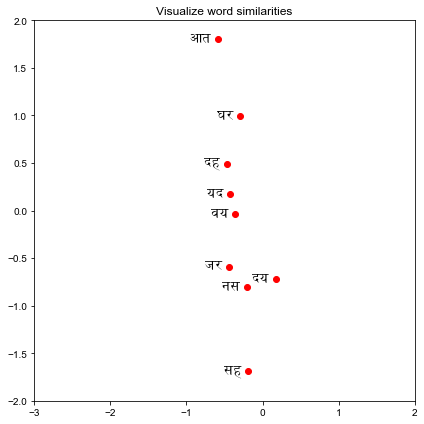

In [9]:
mpl.rcParams['font.sans-serif'] = ['Source Han Sans TW',
                                   'sans-serif',
                                   'Arial Unicode MS'  # fc-list :lang=hi family
                                   ]
matches = model.wv.most_similar(positive=['शक'], negative=[], topn=10)
words = [match[0] for match in matches]
plot_word_vectors(model, words, False, False, -3, 2, -2, 2, 'Visualize word similarities')

## Visualise Word Embeddings

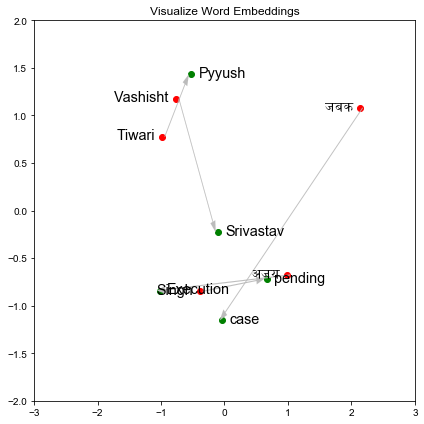

In [10]:
words  = ["Singh","pending","Tiwari","Pyyush","Vashisht","Srivastav","अजय","Execution","जबक","case"]
words = [word for word in words]
plot_word_vectors(model, words, x1=-3, x2=3, y1=-2, y2=2, title='Visualize Word Embeddings')